## Getting Data

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
PATH = untar_data(URLs.PETS); PATH

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [7]:
PATH.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
PATH_ANNO = PATH/'annotations'
PATH_IMG = PATH/'images'

In [9]:
files = get_image_files(PATH_IMG); files[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_57.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_217.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_108.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bengal_39.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_71.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(PATH_IMG, files, pat, ds_tfms=get_transforms(), size=224)

In [0]:
data.normalize(imagenet_stats);

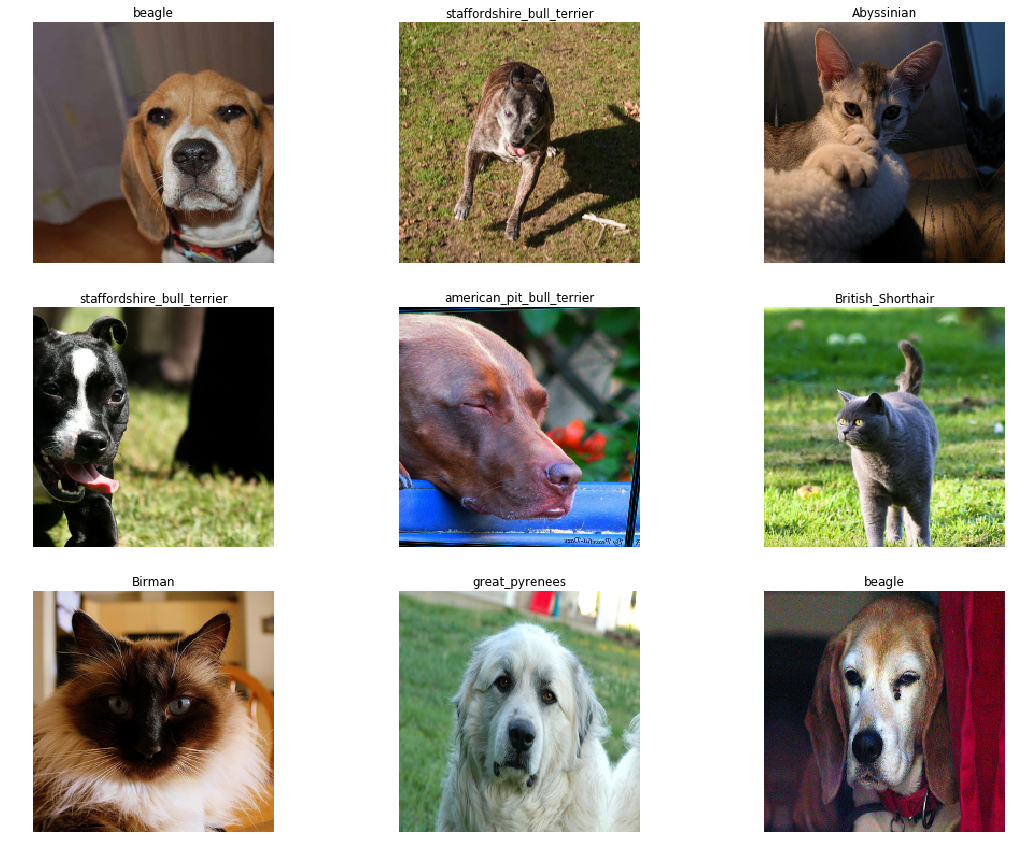

In [23]:
data.show_batch(rows=3, figsize=(16, 12))

In [25]:
classes = data.classes
len(classes), data.c

(37, 37)

In [0]:
learner = cnn_learner(data, models.resnet34, metrics=[accuracy])

In [32]:
learner.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [31]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.387773,0.324826,0.900541,02:08
1,0.568413,0.240106,0.927605,02:10
2,0.357428,0.212695,0.933018,02:10
3,0.268599,0.197964,0.935724,02:11


In [0]:
learner.save('stage-1')

In [0]:
inter = ClassificationInterpretation.from_learner(learner)

In [35]:
losses, idxs = inter.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

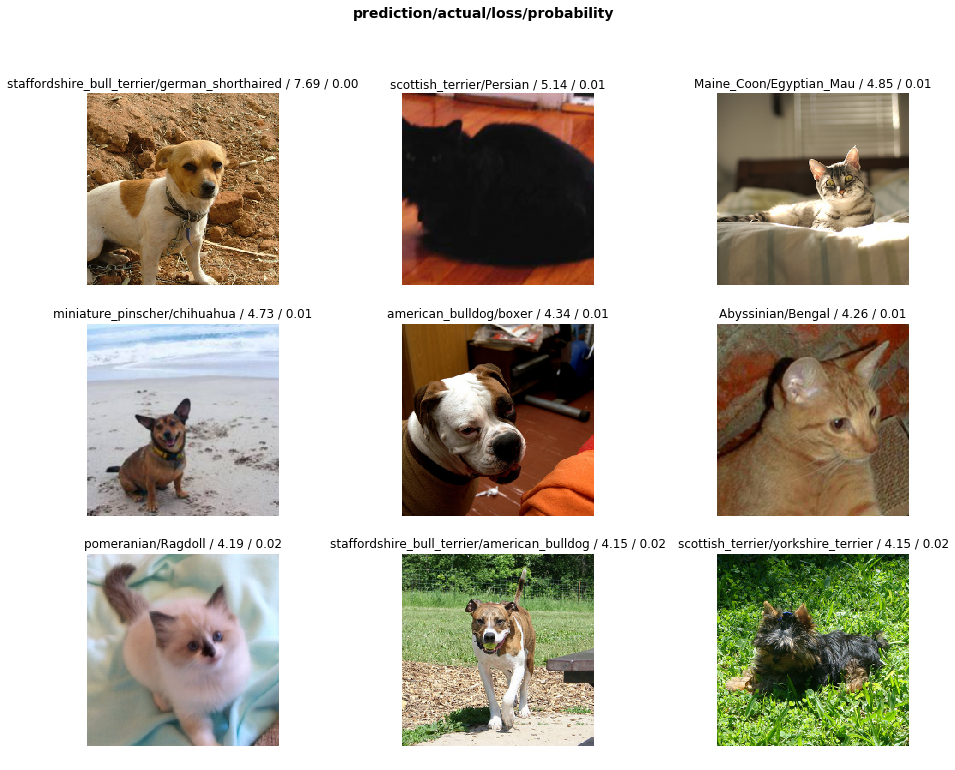

In [38]:
inter.plot_top_losses(9, figsize=(16,12), heatmap=False)

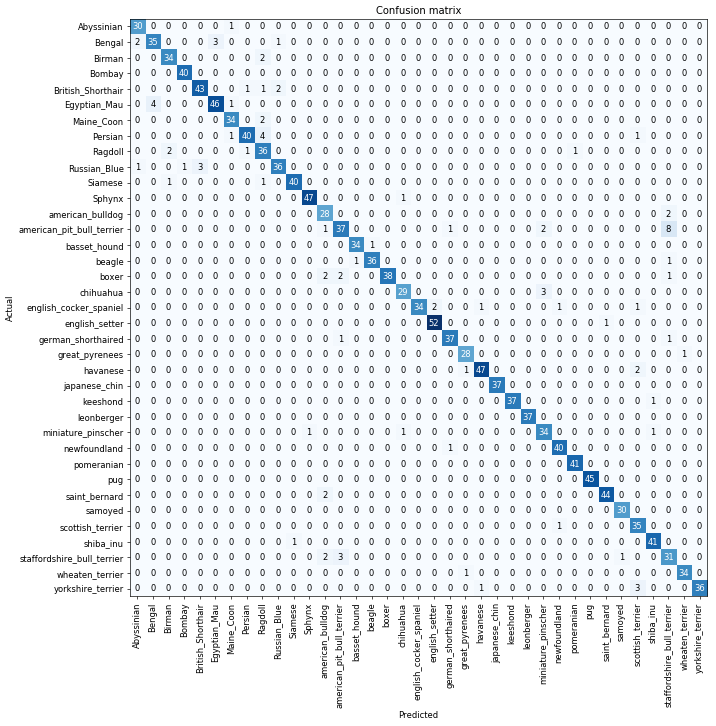

In [39]:
inter.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [41]:
inter.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('Egyptian_Mau', 'Bengal', 4),
 ('Persian', 'Ragdoll', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('yorkshire_terrier', 'scottish_terrier', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Birman', 'Ragdoll', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Ragdoll', 'Birman', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('boxer', 'american_bulldog', 2),
 ('boxer', 'american_pit_bull_terrier', 2),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('havanese', 'scottish_terrier', 2),
 ('saint_bernard', 'american_bulldog', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

In [0]:
learner.unfreeze()

In [43]:
learner.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.521920,0.322297,0.904601,02:05


In [0]:
learner.load('stage-1')

In [46]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


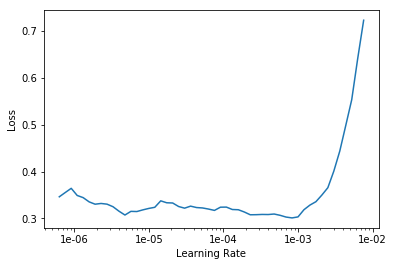

In [48]:
learner.recorder.plot()

In [0]:
learner.unfreeze()

In [51]:
learner.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.318415,0.265159,0.920839,02:10
1,0.269266,0.256007,0.923545,02:15
